# 编程部分

In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy
from scipy import signal
import cv2 as cv
import PIL
import warnings
from PIL import Image, ImageChops
warnings.filterwarnings('ignore')
gray_ = "gray"
epsilon = 1e-7

In [2]:
img = cv.imread('./lena.bmp', 0)

In [3]:
def plot_gray_img(image_, title_=""):
    """
    功能: 显示灰度图
    """
    plt.figure(figsize=(4, 4))
    plt.axis('off');plt.title(title_)
    plt.imshow(image_, cmap=gray_)
    plt.show()

def plot_two_gray_img(img1, img2, title1="", title2=""):
    """
    功能: 并排显示两幅图像
    """
    f = plt.figure(figsize=(8,8))
    f.subplots_adjust(wspace=0.1)
    ax1 = f.add_subplot(121, title=title1)
    ax2 = f.add_subplot(122, title=title2)
    ax1.imshow(img1, cmap=gray_);ax1.axis('off')
    ax2.imshow(+img2, cmap=gray_);ax2.axis('off')
    plt.show()
    
def plot_three_gray_img(img1, img2, img3, title1="", title2="", title3=""):
    """
    功能: 并排显示三幅图像
    """
    f = plt.figure(figsize=(8,8))
    plt.subplot(131);plt.axis('off');plt.title(title1)
    plt.imshow(img1, gray_)
    plt.subplot(132);plt.axis('off');plt.title(title2)
    plt.imshow(img2, gray_)
    plt.subplot(133);plt.axis('off');plt.title(title3)
    plt.imshow(img3, gray_)
    plt.show()

def got_snr(Img, Img_with_noise):
    """
    输入: 原图像, 有噪声的拟合图像 
    输出: 信噪比
    """
    snr = np.sum(Img_with_noise**2)
    snr /= np.sum((Img-Img_with_noise)**2)
    return snr

def got_ifft_img(Img_fs):
    """
    输入: 中心化、标定过的幅度值阵列
    输出: 原图像
    """
    F_ishift = np.fft.ifftshift(Img_fs)
    Img_back = np.fft.ifft2(F_ishift)
    return np.abs(Img_back)

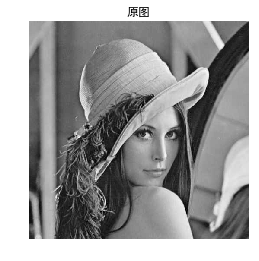

In [4]:
plot_gray_img(img, '原图')

## 图像傅里叶变换

In [5]:
def got_magnitude_spectrum_img(Img):
    """
    输入: 图像 np.array
    输出: 中心化且标定过的幅度值图像
    """
    Img_f = np.fft.fft2(Img)
    Img_fs = np.fft.fftshift(Img_f)
    Img_magnitude_spectrum = 20 * np.log(np.abs(Img_fs)+epsilon)
    return Img_magnitude_spectrum

def got_magnitude_spectrum(Img):
    """
    输入: 图像 np.array
    输出: 未标定过的幅度值
    """
    Img_f = np.fft.fft2(Img)
    Img_fs = np.fft.fftshift(Img_f)
    return Img_fs

def got_phase_angle(Img):
    """
    输入: 图像
    输出: 相角阵列
    """
    Img_f = np.fft.fft2(Img)
    Img_fs = np.fft.fftshift(Img_f)
    return np.angle(Img_fs)

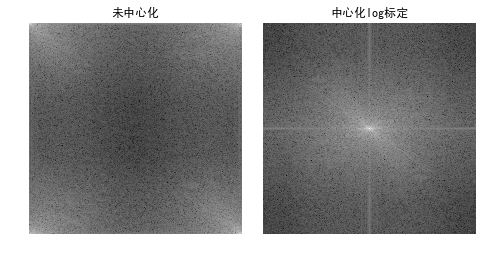

In [6]:
img_f = np.fft.fft2(img)
img_o = np.fft.fft2(img_f)
img_fs = np.fft.fftshift(img_f) # 中心化
o = np.log(np.abs(img_f))
magnitude_spectrum = 20 * np.log(np.abs(img_fs)) # 标定
plot_two_gray_img(o, magnitude_spectrum, '未中心化', '中心化log标定')

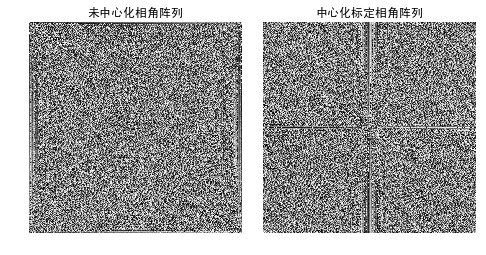

In [7]:
img_a = np.angle(img_f)
img_fa = np.angle(img_fs)
plot_two_gray_img(img_a, img_fa, '未中心化相角阵列', '中心化标定相角阵列')

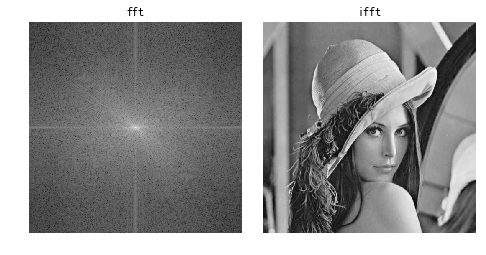

恢复后图像与原图L2距离 7.984575623447163e-11


In [8]:
img_back = got_ifft_img(img_fs)
plot_two_gray_img(magnitude_spectrum, img_back, 'fft', 'ifft')
print('恢复后图像与原图L2距离', np.linalg.norm(img-img_back))

## 傅里叶变换定理

In [9]:
img = np.zeros((513,513))

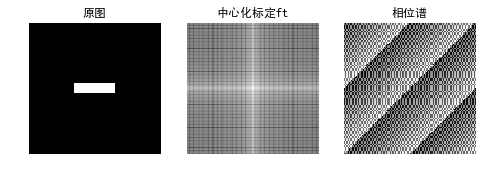

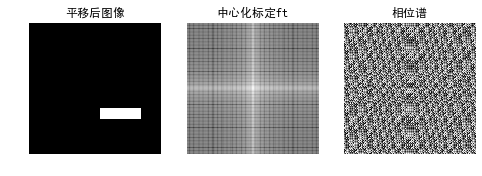

In [10]:
img_wb = img.copy()
img_wb_shift = img.copy()
rr, cc = img.shape[0]//2, img.shape[1]//2
img_wb[rr-20:rr+20, cc-80:cc+80] = 1
rr, cc = rr + 100, cc + 100
img_wb_shift[rr-20:rr+20, cc-80:cc+80] = 1
plot_three_gray_img(
    img_wb, 
    got_magnitude_spectrum_img(img_wb),
    got_phase_angle(img_wb), 
    '原图', '中心化标定ft', '相位谱')
plot_three_gray_img(
    img_wb_shift, 
    got_magnitude_spectrum_img(img_wb_shift), 
    got_phase_angle(img_wb_shift),
    '平移后图像', '中心化标定ft', '相位谱')

In [11]:
waM = cv.getRotationMatrix2D((img.shape[0]//2, img.shape[1]//2), 45, 1.0)
waM_sc = cv.getRotationMatrix2D((img.shape[0]//2, img.shape[1]//2), 45, 3)
img_wb_rotate = cv.warpAffine(img_wb, waM, img_wb.shape)
img_wb_rotate_sc = cv.warpAffine(img_wb, waM_sc, img_wb.shape)

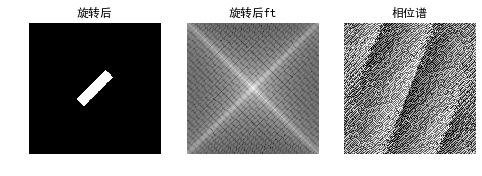

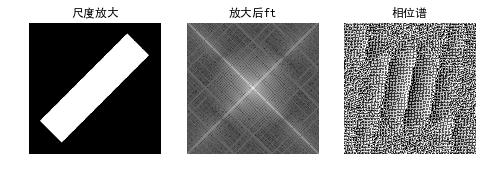

In [12]:
plot_three_gray_img(
    img_wb_rotate, 
    got_magnitude_spectrum_img(img_wb_rotate),
    got_phase_angle(img_wb_rotate), 
    '旋转后', '旋转后ft','相位谱')

plot_three_gray_img(
    img_wb_rotate_sc,
    got_magnitude_spectrum_img(img_wb_rotate_sc), 
    got_phase_angle(img_wb_rotate_sc),
    '尺度放大', '放大后ft', '相位谱')

### 小结
1. 在垂直方向上下需要更多的频率分量，所以频率域的垂直方向更"亮"   
2. 明亮线和原始图像中对应的轮廓线是垂直的  
3. 明亮线反映原始图像的灰度级变化
4. 高频部分越多，图像细节越丰富

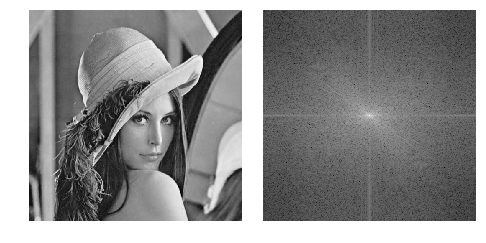

In [13]:
img = cv.imread('./lena.bmp', 0)
img_ms = got_magnitude_spectrum_img(img)
rows, cols= img.shape[0],img.shape[1]
c0, c1 = rows//2, cols//2
plot_two_gray_img(img, img_ms)

## 低通滤波

In [14]:
def PF_2d(r, lowp, flag, d0, d1=None, n=None):
    """
    功能: 低通滤波器
    输入: 
        r: 图像
        lowp: 
            1: 低通
            0: 高通
        flag:
            0：理想低通滤波
            1: 巴特沃斯低通滤波
            2: 梯形低通滤波
            3: 高斯低通滤波
        d0: 低通直径
        d1: 低通直径
        n: 如果是巴特沃斯低通滤波, 则是阶数
    输出:
    """
    nrows = cv.getOptimalDFTSize(r.shape[0])
    ncols = cv.getOptimalDFTSize(r.shape[1])
    r_bst = np.zeros((nrows,ncols))
    r_bst[:rows, :cols] = r
    r_fs = np.fft.fftshift(np.fft.fft2(r_bst))
    center = [nrows//2, ncols//2]
    H = np.zeros(r_fs.shape)
    for u in range(nrows):
        for v in range(ncols):
            duv = np.hypot(u-center[0], v-center[1])
            
            if flag == 0: # 理想滤波器
                H[u][v] = duv < d0 if lowp else duv > d0
            elif flag == 1: # 巴特沃斯滤波器
                H[u][v] = 1 / ((1 + (duv / d0)) ** (2*n)) if lowp \
                else 1 / ((1 + (d0 / duv)) ** (2*n))
            elif flag == 2: # 梯形
                if lowp:
                    if duv > d0:
                        H[u][v] = 1
                    elif duv > d1:
                        H[u][v] = 0
                    elif d0 <= duv and duv <= d1:
                        H[u][v] = (duv-d1)/(d0-d1)
                else:
                    if duv < d0:
                        H[u][v] = 0
                    elif duv > d0:
                        H[u][v] = 1
                    elif d1 <= duv and duv <= d0:
                        H[u][v] = (d0-d1)/(duv-d1)
            elif flag == 3: # 高斯低通
                H[u][v] = (np.e ** (-(duv**2)/(d0**2))) if lowp \
                else (1-np.e ** (-(duv**2)/(d0**2)))
    s_ext = got_ifft_img(r_fs * H)
    s = s_ext[0:r.shape[0], 0:r.shape[1]]
    return s.astype(np.uint8)

### 理想低通滤波器(ILPF)

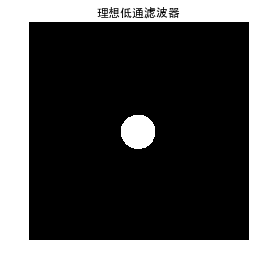

In [15]:
d0 = 40
filter_mat = np.zeros((rows, cols))
cv.circle(filter_mat, (c0,c1), d0, (1, 1, 1), thickness=-1)
plot_gray_img(filter_mat, '理想低通滤波器')

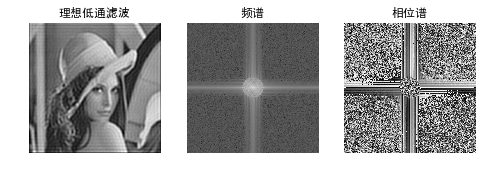

理想低通滤波信噪比 2.083757221914048


In [16]:
ilpf_img_d40 = PF_2d(img, lowp=1, flag=0, d0=40)

plot_three_gray_img(
    ilpf_img_d40, 
    got_magnitude_spectrum_img(ilpf_img_d40), 
    got_phase_angle(ilpf_img_d40),
    "理想低通滤波","频谱","相位谱")
print("理想低通滤波信噪比", got_snr(img, ilpf_img_d40))

有明显的杠铃现象

### 巴特沃斯低通滤波器

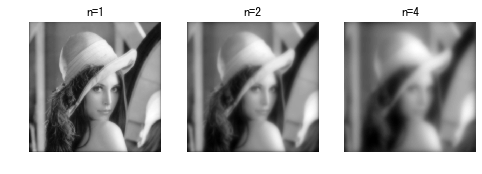

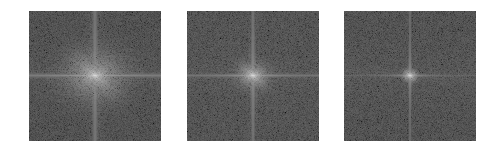

n = 1 snr= 1.290167729230669
n = 2 snr= 1.0909009061546284
n = 4 snr= 0.9168980464004112


In [17]:
BLPF_n1 = PF_2d(img, lowp=1, flag=1, d0=40, n=1)
BLPF_n2 = PF_2d(img, lowp=1, flag=1, d0=40, n=2)
BLPF_n4 = PF_2d(img, lowp=1, flag=1, d0=40, n=4)

plot_three_gray_img(
    BLPF_n1, BLPF_n2, BLPF_n4, "n=1","n=2","n=4")
plot_three_gray_img(
    got_magnitude_spectrum_img(BLPF_n1),
    got_magnitude_spectrum_img(BLPF_n2),
    got_magnitude_spectrum_img(BLPF_n4)
)
print('n = 1 snr=', got_snr(img, BLPF_n1))
print('n = 2 snr=', got_snr(img, BLPF_n2))
print('n = 4 snr=', got_snr(img, BLPF_n4))

### 梯形低通滤波器

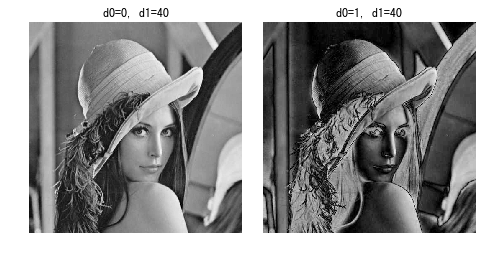

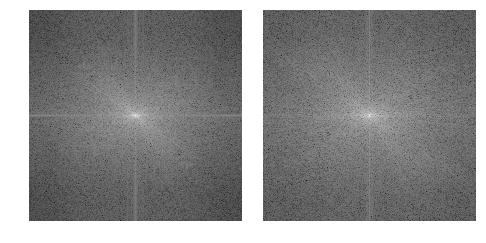

d0=0 梯形低通滤波器 snr=  524.0612213086006
d0=1 梯形低通滤波器 snr=  1.3637790670957284


In [18]:
LLPF_img_d0 = PF_2d(img, lowp=1, flag=2, d0=0, d1=40)
LLPF_img_d1 = PF_2d(img, lowp=1, flag=2, d0=1, d1=40)
plot_two_gray_img(LLPF_img_d0, LLPF_img_d1, 'd0=0, d1=40', 'd0=1, d1=40')
plot_two_gray_img(
    got_magnitude_spectrum_img(LLPF_img_d0), 
    got_magnitude_spectrum_img(LLPF_img_d1))
print('d0=0 梯形低通滤波器 snr= ', got_snr(img, LLPF_img_d0))
print('d0=1 梯形低通滤波器 snr= ', got_snr(img, LLPF_img_d1))

### 指数(高斯)低通滤波器

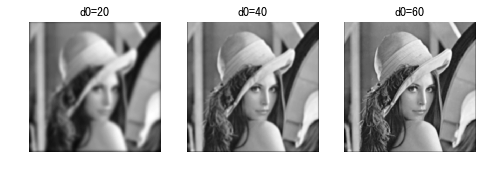

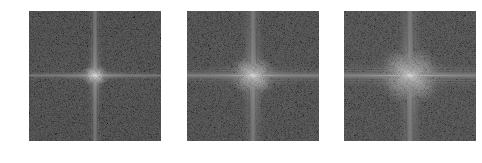

d0=20 高斯低通滤波器 snr= 1.732148109269222
d0=40 高斯低通滤波器 snr= 2.5887622577479235
d0=60 高斯低通滤波器 snr= 3.429571798799274


In [19]:
glpf_img_d20 = PF_2d(img, lowp=1, flag=3, d0=20)
glpf_img_d40 = PF_2d(img, lowp=1, flag=3, d0=40)
glpf_img_d60 = PF_2d(img, lowp=1, flag=3, d0=60)
plot_three_gray_img(glpf_img_d20, glpf_img_d40, glpf_img_d60,
                   "d0=20", "d0=40","d0=60")
plot_three_gray_img(
    got_magnitude_spectrum_img(glpf_img_d20),
    got_magnitude_spectrum_img(glpf_img_d40),
    got_magnitude_spectrum_img(glpf_img_d60),
    )
print("d0=20 高斯低通滤波器 snr=", got_snr(img, glpf_img_d20))
print("d0=40 高斯低通滤波器 snr=", got_snr(img, glpf_img_d40))
print("d0=60 高斯低通滤波器 snr=", got_snr(img, glpf_img_d60))

## 高通滤波

### 理想高通滤波器

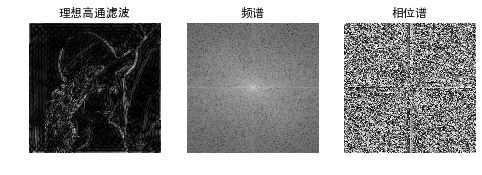

理想高通滤波信噪比 0.6670534534116651


In [20]:
ilpf_img_d20 = PF_2d(img, lowp=0, flag=0, d0=20)

plot_three_gray_img(
    ilpf_img_d20, 
    got_magnitude_spectrum_img(ilpf_img_d20), 
    got_phase_angle(ilpf_img_d20),
    "理想高通滤波","频谱","相位谱")
print("理想高通滤波信噪比", got_snr(img, ilpf_img_d20))

### 巴特沃斯高通滤波器

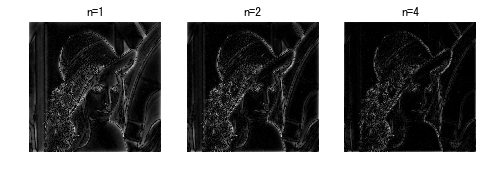

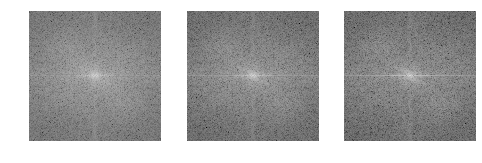

巴特沃斯高通滤波器 n=1 snr= 0.7550728466275354
巴特沃斯高通滤波器 n=2 snr= 0.4604621455930392
巴特沃斯高通滤波器 n=4 snr= 0.2654743729845073


In [21]:
BLPF_n1 = PF_2d(img, lowp=0, flag=1, d0=5, n=1)
BLPF_n2 = PF_2d(img, lowp=0, flag=1, d0=5, n=2)
BLPF_n4 = PF_2d(img, lowp=0, flag=1, d0=5, n=4)

plot_three_gray_img(
    BLPF_n1, BLPF_n2, BLPF_n4, "n=1","n=2","n=4")
plot_three_gray_img(
    got_magnitude_spectrum_img(BLPF_n1),
    got_magnitude_spectrum_img(BLPF_n2),
    got_magnitude_spectrum_img(BLPF_n4)
)
print('巴特沃斯高通滤波器 n=1 snr=', got_snr(img, BLPF_n1))
print('巴特沃斯高通滤波器 n=2 snr=', got_snr(img, BLPF_n2))
print('巴特沃斯高通滤波器 n=4 snr=', got_snr(img, BLPF_n4))

### 梯形高通滤波器

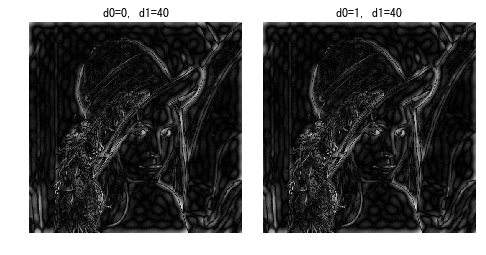

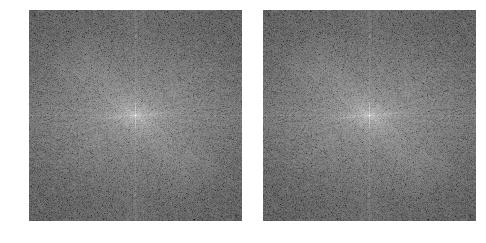

d0=0 梯形高通滤波器 snr=  0.7138076070734024
d0=1 梯形高通滤波器 snr=  0.7138076070734024


In [22]:
LLPF_img_d0 = PF_2d(img, lowp=0, flag=2, d0=15, d1=20)
LLPF_img_d1 = PF_2d(img, lowp=0, flag=2, d0=15, d1=50)
plot_two_gray_img(LLPF_img_d0, LLPF_img_d1, 
                  'd0=0, d1=40', 'd0=1, d1=40')
plot_two_gray_img(
    got_magnitude_spectrum_img(LLPF_img_d0), 
    got_magnitude_spectrum_img(LLPF_img_d1))
print('d0=0 梯形高通滤波器 snr= ', got_snr(img, LLPF_img_d0))
print('d0=1 梯形高通滤波器 snr= ', got_snr(img, LLPF_img_d1))

### 指数高通滤波器

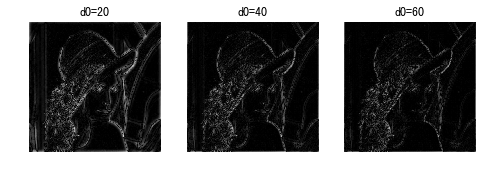

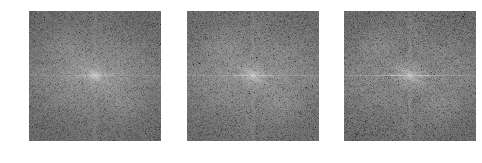

d0=20 高斯高通滤波器 snr= 0.5502121504968576
d0=40 高斯高通滤波器 snr= 0.36172074969332696
d0=60 高斯高通滤波器 snr= 0.2685216338781197


In [23]:
glpf_img_d20 = PF_2d(img, lowp=0, flag=3, d0=20)
glpf_img_d40 = PF_2d(img, lowp=0, flag=3, d0=40)
glpf_img_d60 = PF_2d(img, lowp=0, flag=3, d0=60)
plot_three_gray_img(glpf_img_d20, glpf_img_d40, glpf_img_d60,
                   "d0=20", "d0=40","d0=60")
plot_three_gray_img(
    got_magnitude_spectrum_img(glpf_img_d20),
    got_magnitude_spectrum_img(glpf_img_d40),
    got_magnitude_spectrum_img(glpf_img_d60),
    )
print("d0=20 高斯高通滤波器 snr=", got_snr(img, glpf_img_d20))
print("d0=40 高斯高通滤波器 snr=", got_snr(img, glpf_img_d40))
print("d0=60 高斯高通滤波器 snr=", got_snr(img, glpf_img_d60))

### 总结:
高通滤波后图像失去了它的灰度色调, 因为直流项减少为0

## 高通增强滤波

In [24]:
def PF_2d(r, d0, k1, k2):
    nrows = cv.getOptimalDFTSize(r.shape[0])
    ncols = cv.getOptimalDFTSize(r.shape[1])
    r_bst = np.zeros((nrows,ncols))
    r_bst[:rows, :cols] = r
    r_fs = np.fft.fftshift(np.fft.fft2(r_bst))
    center = [nrows//2, ncols//2]
    H = np.zeros(r_fs.shape)
    for u in range(nrows):
        for v in range(ncols):
            duv = np.hypot(u-center[0], v-center[1])
            H[u][v] = (1-np.e ** (-(duv**2)/(d0**2)))
    s_ext = got_ifft_img(r_fs * (k2*H+k1))
    s = s_ext[0:r.shape[0], 0:r.shape[1]]
    return s.astype(np.uint8)

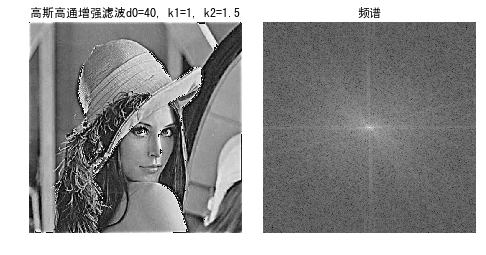

高斯高通增强滤波器 snr= 2.089958018639116


In [25]:
GHEF_img = PF_2d(img, d0=40, k1=1,k2=1.5)
plot_two_gray_img(GHEF_img, got_magnitude_spectrum_img(GHEF_img),
                 "高斯高通增强滤波d0=40, k1=1, k2=1.5","频谱")
print("高斯高通增强滤波器 snr=", got_snr(img, GHEF_img))

# 理论部分

1. 已知$N\times N$的$f(x,y)$的傅里叶变换为$F(u,v)$，写出$f(x,y)\mathrm{exp}[j\pi (x+y)]$的傅里叶变换。（习题4.1，P92）
 


$\displaystyle \begin{align*}
 \Im\{f(x,y)e^{j\pi (x+y)}\}
&= \sum_{x=0}^{N-1}\sum_{y=0}^{N-1}\left[ f(x,y)e^{-2j\pi(ux/N+vy/N)}\right]\cdot e^{j\pi (x+y)}\\ 
&= \sum_{x=0}^{N-1}\sum_{y=0}^{N-1}\left[ f(x,y)e^{-2j\pi((u-\frac{1}{2})x/N+(v-\frac{1}{2})y/N)}\right] \\
&= F(u-\frac{1}{2}, v-\frac{1}{2})
\end{align*}$

2. 一个$2-D$函数在以坐标$(0,0)$为其中心的单位正方形外为$0$，在以坐标$(0,0)$为其中心的半个单位的正方形内也为$0$，   
而在其他位置均为$1$。计算它的傅里叶变换。（习题4.2，P92）

$
\begin{align*} \displaystyle F(\mu, v)
&= \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(t,z)e^{-2j\pi(\mu t+vz)}dtdz \\
&= \int_{-1}^{1}\int_{-1}^{1}e^{-2j\pi(\mu t+vz)}dtdz - \int_{-\frac{1}{2}}^{\frac{1}{2}}\int_{-\frac{1}{2}}^{\frac{1}{2}}e^{-2j\pi(\mu t+vz)}dtdz \\
&= 4\left[\frac{sin(2\pi \mu)}{2\pi\mu }\right]\left[\frac{sin(2\pi v)}{2\pi v}\right] - \left[\frac{sin(\pi \mu)}{\pi\mu }\right]\left[\frac{sin(\pi v)}{\pi v}\right] \\
&= 4sinc(2\pi\mu)-sinc(\pi v)\end{align*}
$


3. 用图$(a)$所示的模板与图像卷积可获得对图像低通滤波的效果，那用图$(b)$所示的模板与图像卷积可获得什么效果呢？  
试给出图$(b)$所示的模板在频域的等价滤波器$H(u,v)$，并解释其功能。（习题4.11，P92。提示：傅里叶变换的卷积定理）  
![](https://i.loli.net/2018/11/11/5be8358107b5a.png)

对于图$(b)$滤波后的函数为   
$g(x,y)=\left[f(x,y+1)+f(x,y-1)+f(x-1,y)+f(x+1,y) \right] \;\;\;\; (3.1)$    
又因为$G(u,v)=H(u,v)\cdot F(u,v)$和平移不变形$\displaystyle f(x-x_0,y-y_0)\Leftrightarrow F(u,v)e^{-2j\pi(x_0u/M+y_0v/N)}$   
将$(3.1)$式等号右侧替换得:   
$\;\;\;\;\;
\begin{align*}
G(u,v)
&=\left[e^{-2j\pi(-v/N)}+e^{-2j\pi(v/N)}+e^{-2j\pi(u/M)}+e^{-2j\pi(-u/M)}\right]F(u,v) \\
&=2\left[cos(2\pi u/M)+cos(2\pi v/N)\right]
\end{align*}$   
将滤波器变为频率中心对称    
$H(u,v)=2\left[cos(2\pi (u-M/2)/M)+cos(2\pi (v-N/2)/N)\right]$   
当$(u,v)=2[M/2,N/2]$时, $H(u,v)=2$  
该滤波器插值平滑图像